# Task 2: Model Building

In [1]:
# Importing the necessary libraries
import os
import sys
import pandas as pd
from glob import glob
from pathlib import Path

In [2]:
# add the project root to the python path
project_root =  Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

### Loading the Dataset

In [3]:
# import functions from the utils module
from src.utils.data_loader import load_data
from importlib import reload
import src.utils.data_loader
reload(src.utils.data_loader)

<module 'src.utils.data_loader' from '/home/chalasimon/Documents/10academy/week 8/challenge/Fraud-detection-for-e-commerce-and-bank-credit/src/utils/data_loader.py'>

In [4]:
fraud_data_path = "../data/processed/final_fraud_data.csv"
credit_data_path="../data/raw/creditcard.csv"
fraud_df = load_data(fraud_data_path)
credit_df=load_data(credit_data_path)

In [5]:
print(f"Fraud data shape: {fraud_df.shape}")
print(f"Credit data shape: {credit_df.shape}")

Fraud data shape: (151112, 203)
Credit data shape: (284807, 31)


### Data Overview

In [6]:
# Data Overview for both datasets
print("Fraud Data Overview:")
print(fraud_df.describe(include='all'))
print("\nCredit Data Overview:")
print(credit_df.describe(include='all'))

Fraud Data Overview:
             user_id          signup_time        purchase_time  \
count   1.511120e+05               151112               151112   
unique           NaN               151112               150679   
top              NaN  2015-03-03 11:27:19  2015-06-08 09:42:04   
freq             NaN                    1                    3   
mean    1.050918e-16                  NaN                  NaN   
std     1.000003e+00                  NaN                  NaN   
min    -1.735035e+00                  NaN                  NaN   
25%    -8.626982e-01                  NaN                  NaN   
50%    -1.846607e-03                  NaN                  NaN   
75%     8.657702e-01                  NaN                  NaN   
max     1.732087e+00                  NaN                  NaN   

        purchase_value      device_id           age    ip_address  \
count     1.511120e+05         151112  1.511120e+05  1.511120e+05   
unique             NaN         137956           

In [7]:
# rename the target column in credit_df to 'class'
credit_df = credit_df.rename(columns={'Class': 'class'})

In [8]:
# scale numerical features of credit_df
from src.data_preprocessing.Preprocessor import Preprocessor
preprocessor = Preprocessor(credit_df)
credit_df = preprocessor.scale_numerical_features(credit_df, ds=True)

In [9]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [10]:
# load the module for model building
from src.model_building.ModelBuilder import ModelBuilder
import src.model_building.ModelBuilder
reload(src.model_building.ModelBuilder)

<module 'src.model_building.ModelBuilder' from '/home/chalasimon/Documents/10academy/week 8/challenge/Fraud-detection-for-e-commerce-and-bank-credit/src/model_building/ModelBuilder.py'>

In [11]:
fraud_model_obj= ModelBuilder(fraud_df)
credit_model_obj = ModelBuilder(credit_df)

Preparing data...
Splitting data...
Handling class imbalance...
Saving resampled data...
Training Logistic Regression model...


/home/chalasimon/Documents/10academy/week 8/challenge/Fraud-detection-for-e-commerce-and-bank-credit/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression training time: 251.89 seconds
Training Gradient Boosting model...
[LightGBM] [Info] Number of positive: 109568, number of negative: 109568
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2320
[LightGBM] [Info] Number of data points in the train set: 219136, number of used features: 127
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Gradient Boosting training time: 4.05 seconds
Evaluating models...
Logistic Regression Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     27393
           1       0

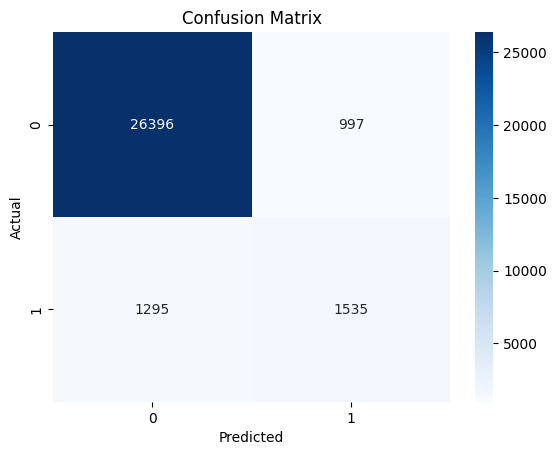

ROC AUC Score: 0.7630107327979253


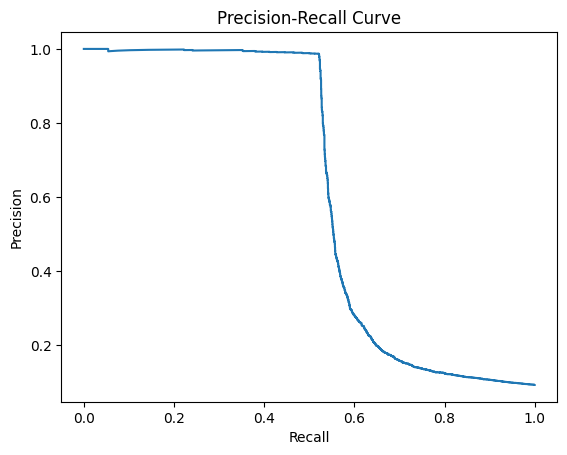

F1 Score: 0.5725475568817605

Gradient Boosting Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98     27393
           1       0.99      0.53      0.69      2830

    accuracy                           0.96     30223
   macro avg       0.97      0.76      0.83     30223
weighted avg       0.96      0.96      0.95     30223

Confusion Matrix:


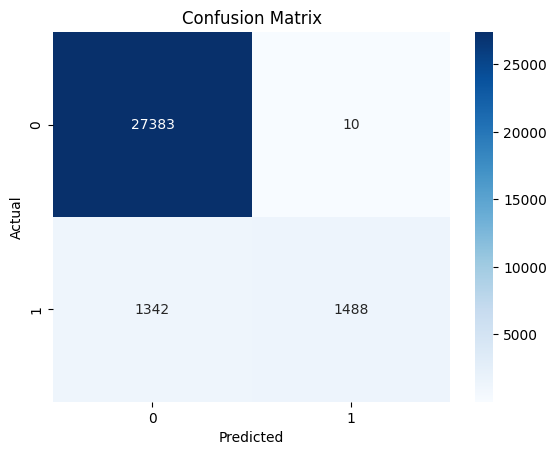

ROC AUC Score: 0.7643964199153817


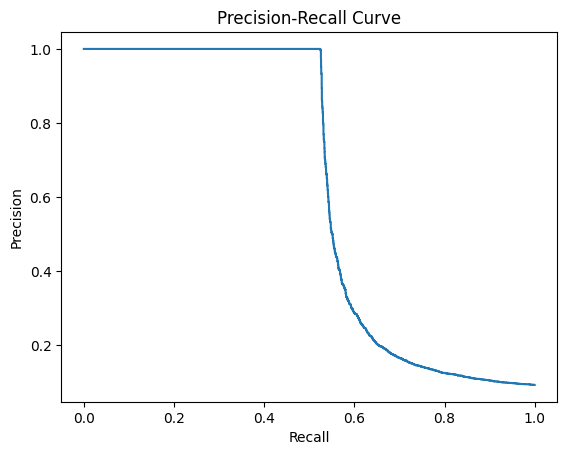

F1 Score: 0.6876155268022182
Saving models...
Model saved to ../models/fraud_logistic_regression_model.pkl
Model saved to ../models/fraud_gradient_boosting_model.pkl
Preparing data...
Splitting data...
Handling class imbalance...
Saving resampled data...
Training Logistic Regression model...


/home/chalasimon/Documents/10academy/week 8/challenge/Fraud-detection-for-e-commerce-and-bank-credit/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression training time: 209.62 seconds
Training Gradient Boosting model...
[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Gradient Boosting training time: 9.86 seconds
Evaluating models...
Logistic Regression Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.13      0.91      0.22        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted

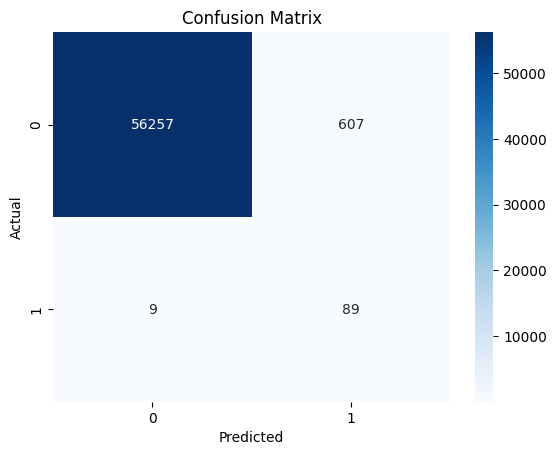

ROC AUC Score: 0.9759850391338303


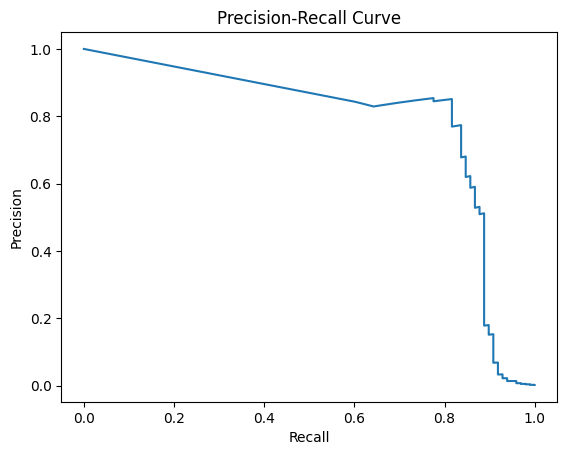

F1 Score: 0.22418136020151133

Gradient Boosting Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.85      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:


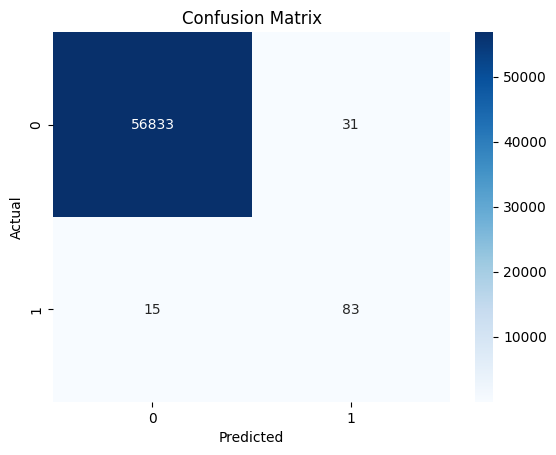

ROC AUC Score: 0.9709400625050245


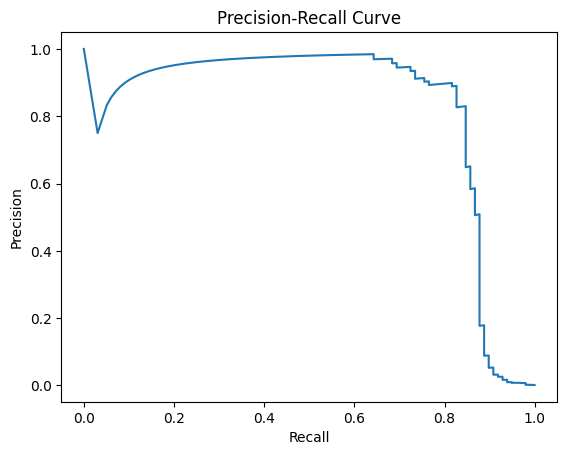

F1 Score: 0.7830188679245284
Saving models...
Model saved to ../models/credit_logistic_regression_model.pkl
Model saved to ../models/credit_gradient_boosting_model.pkl


In [12]:
# run pipeline for fraud data
fraud_model_obj.run_pipeline(data="fraud")

# run pipeline for credit data
credit_model_obj.run_pipeline(data="credit")